In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pickle
from sklearn.metrics import accuracy_score

In [29]:
df = pd.read_csv(r"C:\Users\phoebe\Documents\Semester_4\UAS_Model Deployment\data_1D (1).csv")
df.head()

Unnamed: 0  age       job   marital          education default housing  \
0           0   83   retired  divorced           basic.4y      no      no   
1           1   32  services   married        high.school      no      no   
2           2   31    admin.    single  university.degree      no     yes   
3           3   33    admin.    single  university.degree      no     yes   
4           4   39  services   married        high.school      no     yes   

  loan    contact month day_of_week  duration  campaign  pdays  previous  \
0   no   cellular   nov         tue     242.0         1      3         3   
1   no  telephone   may         tue     190.0         3    999         0   
2   no  telephone   may         wed     325.0         2    999         0   
3   no  telephone   aug         thu     158.0         1    999         0   
4   no  telephone   jul         mon     158.0         1    999         0   

      poutcome    y  
0      success  yes  
1  nonexistent   no  
2  nonexistent   no  
3  nonexistent   no  
4  nonexistent   no

In [30]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8238 non-null   int64  
 1   age          8238 non-null   int64  
 2   job          8230 non-null   object 
 3   marital      8238 non-null   object 
 4   education    8238 non-null   object 
 5   default      8238 non-null   object 
 6   housing      8238 non-null   object 
 7   loan         8238 non-null   object 
 8   contact      8238 non-null   object 
 9   month        8238 non-null   object 
 10  day_of_week  8238 non-null   object 
 11  duration     8226 non-null   float64
 12  campaign     8238 non-null   int64  
 13  pdays        8238 non-null   int64  
 14  previous     8238 non-null   int64  
 15  poutcome     8238 non-null   object 
 16  y            8238 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


In [31]:
data = df.drop("Unnamed: 0",axis=1 )
data.head()

age       job   marital          education default housing loan    contact  \
0   83   retired  divorced           basic.4y      no      no   no   cellular   
1   32  services   married        high.school      no      no   no  telephone   
2   31    admin.    single  university.degree      no     yes   no  telephone   
3   33    admin.    single  university.degree      no     yes   no  telephone   
4   39  services   married        high.school      no     yes   no  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome    y  
0   nov         tue     242.0         1      3         3      success  yes  
1   may         tue     190.0         3    999         0  nonexistent   no  
2   may         wed     325.0         2    999         0  nonexistent   no  
3   aug         thu     158.0         1    999         0  nonexistent   no  
4   jul         mon     158.0         1    999         0  nonexistent   no

In [32]:
import pandas as pd

# Assuming `df` is your DataFrame
df_encoded = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

# Label encoding for target variable 'y'
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

# Display the encoded DataFrame
df_encoded

age  duration  campaign  pdays  previous  y  job_admin.  \
0      83     242.0         1      3         3  1       False   
1      32     190.0         3    999         0  0       False   
2      31     325.0         2    999         0  0        True   
3      33     158.0         1    999         0  0        True   
4      39     158.0         1    999         0  0       False   
...   ...       ...       ...    ...       ... ..         ...   
8233   33     471.0         1    999         0  0       False   
8234   47      98.0         1    999         0  0       False   
8235   24      68.0         4    999         1  0       False   
8236   39     150.0         1    999         0  0       False   
8237   63     150.0         1    999         1  1       False   

      job_blue-collar  job_entrepreneur  job_housemaid  ...  month_oct  \
0               False             False          False  ...      False   
1               False             False          False  ...      False   
2               False             False          False  ...      False   
3               False             False          False  ...      False   
4               False             False          False  ...      False   
...               ...               ...            ...  ...        ...   
8233            False             False          False  ...      False   
8234            False             False          False  ...      False   
8235            False             False          False  ...      False   
8236            False              True          False  ...      False   
8237            False             False          False  ...      False   

      month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0         False            False            False            False   
1         False            False            False            False   
2         False            False            False            False   
3         False            False            False             True   
4         False            False             True            False   
...         ...              ...              ...              ...   
8233      False            False             True            False   
8234      False            False            False            False   
8235      False             True            False            False   
8236      False            False            False             True   
8237      False            False            False            False   

      day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                True            False             False   
1                True            False             False   
2               False             True             False   
3               False            False             False   
4               False            False             False   
...               ...              ...               ...   
8233            False            False             False   
8234             True            False             False   
8235            False            False              True   
8236            False            False             False   
8237            False             True              True   

      poutcome_nonexistent  poutcome_success  
0                    False              True  
1                     True             False  
2                     True             False  
3                     True             False  
4                     True             False  
...                    ...               ...  
8233                  True             False  
8234                  True             False  
8235                 False             False  
8236                  True             False  
8237                 False             False  

[8238 rows x 58 columns]

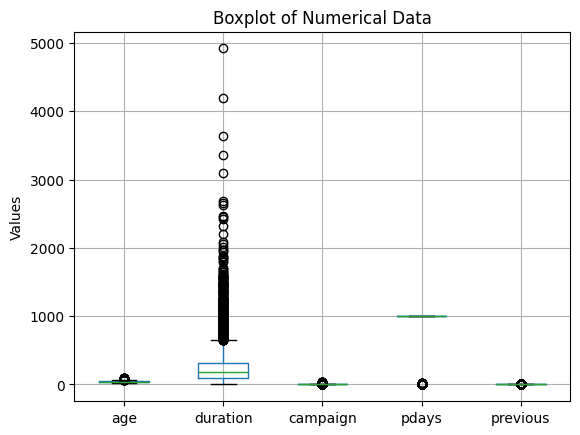

In [33]:
# Plotting boxplots for specific columns
df_encoded[['age', 'duration', 'campaign', 'pdays', 'previous']].boxplot()

# Add title and labels
plt.title('Boxplot of Numerical Data')
plt.ylabel('Values')

# Show plot
plt.show()

In [69]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            8238 non-null   int64  
 1   duration                       8226 non-null   float64
 2   campaign                       8238 non-null   int64  
 3   pdays                          8238 non-null   int64  
 4   previous                       8238 non-null   int64  
 5   y                              8238 non-null   int64  
 6   job_admin.                     8238 non-null   bool   
 7   job_blue-collar                8238 non-null   bool   
 8   job_entrepreneur               8238 non-null   bool   
 9   job_housemaid                  8238 non-null   bool   
 10  job_management                 8238 non-null   bool   
 11  job_retired                    8238 non-null   bool   
 12  job_self-employed              8238 non-null   b

Ada null value sehingga perlu diremove 

In [34]:
df_nonOutlier = df_encoded
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Removing outliers for each numerical column
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
for col in numerical_columns:
    df_nonOutlier = remove_outliers(df_nonOutlier, col)
    

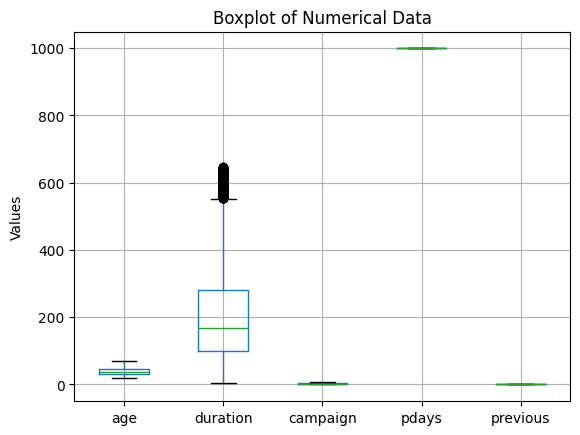

In [35]:
# Plotting boxplots for specific columns
df_nonOutlier[['age', 'duration', 'campaign', 'pdays', 'previous']].boxplot()

# Add title and labels
plt.title('Boxplot of Numerical Data')
plt.ylabel('Values')

# Show plot
plt.show()

In [48]:
x_no = df_nonOutlier.drop('y', axis=1)  # Features
y_no = df_nonOutlier['y']  # Target variable

# Split data into training, validation, and testing sets
x_train_no, x_test_no, y_train_no, y_test_no = train_test_split(x_no, y_no, test_size=0.2, random_state=42)
x_test_no, x_val_no, y_test_no, y_val_no = train_test_split(x_test_no, y_test_no, test_size=0.5, random_state=42) 

print("Train Shape: ",x_train_no.shape)
print("Test Shape: ",x_test_no.shape)
print("Validation shape: ",x_val_no.shape)

Train Shape:  (4908, 57)
Test Shape:  (613, 57)
Validation shape:  (614, 57)


In [44]:
x = df_encoded.drop('y', axis=1)  # Features
y = df_encoded['y']  # Target variable

# Split data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42) 

print("Train Shape: ",x_train.shape)
print("Test Shape: ",x_test.shape)
print("Validation shape: ",x_val.shape)

Train Shape:  (6590, 57)
Test Shape:  (824, 57)
Validation shape:  (824, 57)


In [ ]:
# Fill null values with mean (you can use any other strategy like median or mode)
x_train = x_train.fillna(x_train.median())
x_train_no = x_train_no.fillna(x_train_no.median())

In [70]:
# Fill null values with mean (you can use any other strategy like median or mode)
x_test = x_train.fillna(x_train.median())
x_test_no = x_train_no.fillna(x_train_no.median())

# Random forest

with scale

In [65]:
# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=1000,criterion='gini',random_state=42)

# Fit and evaluate with x_train
rf_classifier.fit(x_train, y_train)
y_pred_train = rf_classifier.predict(x_test)
accuracy_train = accuracy_score(y_test, y_pred_train)

# Fit and evaluate with x_train_no
rf_classifier.fit(x_train_no, y_train_no)
y_pred_train_no = rf_classifier.predict(x_test)
accuracy_train_no = accuracy_score(y_test, y_pred_train_no)

# Print accuracies
print(f"Accuracy with x_train: {accuracy_train}")
print(f"Accuracy with x_train_no: {accuracy_train_no}")


Accuracy with x_train: 0.904126213592233
Accuracy with x_train_no: 0.9308252427184466


Bagusan x_train_no meaning no outliers dibilang lebih bagus sehingga model kita jadi code 